In [18]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches ## para los rectangulos de las graficas
from random import random
from scipy.integrate import quad, dblquad, tplquad ## para el ejercicio 10

> **Ejercicio 1:** Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

In [19]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
x_values = [a-h,a]                  # Intervalo simbólico, lista que contiene variables simbólicas
y_values = [f(x_values[0]),f(x_values[1])]
x = sp.Symbol('x')
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p.subs({x:x_values[0]}),p.subs({x:x_values[1]})
print("----------------diferencia regresiva-------------------")
sp.diff(p,x) ## vemos que se trata de la diferencia regresiva





----------------diferencia regresiva-------------------


(f(a) - f(a - h))/h

In [20]:
x1_values = [a-h,a+h]    
y1_values = [f(x1_values[0]),f(x1_values[1])]
p1 = (y1_values[1]-y1_values[0])/(x1_values[1]-x1_values[0])*(x-x1_values[0])+y1_values[0]
p1.subs({x:x1_values[0]}),p1.subs({x:x1_values[1]})
print("----------------diferencia centrada-------------------")
sp.diff(p1,x) ## vemos que se trata de la diferencia centrada


----------------diferencia centrada-------------------


(-f(a - h) + f(a + h))/(2*h)

> **Ejercicio 2:** Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

In [21]:
def calcula_formula_interp(x_values, orden):
    f = sp.Function('f') 
    x = sp.Symbol('x')
    
    x_values = [sp.sympify(xi) for xi in x_values] # uso cada nodo como una expresion simbolica
    p = 0
    for k in range(len(x_values)):
        lk = 1
        for i in range(len(x_values)):
            if i != k:
                lk *= (x - x_values[i])/(x_values[k] - x_values[i])
        p += f(x_values[k]) * lk
    p = sp.diff(p, x,orden)
    return p

print("-------------diferencia regresiva-----------------")
p = calcula_formula_interp(['a','a-h'],1)
display(p)
print("-------------diferencia progresiva-----------------")
p = calcula_formula_interp(['a','a+h'],1)
display(p)
print("-------------diferencia centrada-----------------")
p1 = calcula_formula_interp(['a-h','a+h'],1)
display(p1)

print("-------------centrada con tres nodos para f''-----------------")
p1 = calcula_formula_interp(['a-h','a','a+h'],2)
display(p1)
print("-------------descentrada con tres nodos para f'-----------------")
p1 = calcula_formula_interp(['a','a+h','a+2*h'],2)
display(sp.simplify(p1))


-------------diferencia regresiva-----------------


f(a)/h - f(a - h)/h

-------------diferencia progresiva-----------------


-f(a)/h + f(a + h)/h

-------------diferencia centrada-----------------


-f(a - h)/(2*h) + f(a + h)/(2*h)

-------------centrada con tres nodos para f''-----------------


(-2*f(a) + f(a - h) + f(a + h))/h**2

-------------descentrada con tres nodos para f'-----------------


(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

> **Ejercicio 3**: Repita este procedimiento con la fórmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximación 2.

In [22]:
## primera manera , viendo la diferencia entre x^i y f''(x^i) para i = 1,2,3,....n

def formula(f):
    return (f(a+h)-2*f(a) + f(a-h))/h**2

f = sp.Function('f')
formula(f)
orden =7
valoresexactos =[sp.diff(x**i,x,2).subs({x:a}) for i in range(orden)]
valoresaprox =[formula(lambda x:x**i).simplify() for i in range(orden)]
diferencia = [valoresaprox[i] -valoresexactos[i] for i in range(orden)]
print("-------------Valores exactos de la derviada segunda en un punto-----------------")
print(valoresexactos)
print("-------------Valores aproximados de la derviada segunda en un punto-----------------")
print(valoresaprox)
print("-------------Diferencia de valores-----------------")
print(diferencia)

-------------Valores exactos de la derviada segunda en un punto-----------------
[0, 0, 2, 6*a, 12*a**2, 20*a**3, 30*a**4]
-------------Valores aproximados de la derviada segunda en un punto-----------------
[0, 0, 2, 6*a, 12*a**2 + 2*h**2, 10*a*(2*a**2 + h**2), (-2*a**6 + (a - h)**6 + (a + h)**6)/h**2]
-------------Diferencia de valores-----------------
[0, 0, 0, 0, 2*h**2, -20*a**3 + 10*a*(2*a**2 + h**2), -30*a**4 + (-2*a**6 + (a - h)**6 + (a + h)**6)/h**2]


Podemos ver que esta formula es de orden 3 ya que desde x^0 hasta x^3 la diferencia entre el valor aproximado y el valor real es 0 y en x^4 ya no lo es 

In [23]:
## Segundo metodo , usando el desarrollo de taylor 
orden=6
fseries =(f(x).series(x,a,orden).removeO())
fmas    = fseries.subs({x:(a+h)})           # Polin. Taylor para x=a+h
fmenos  = fseries.subs({x:(a-h)})           # Polin. Taylor para x=a-h
fsimple = fseries.subs({x:(a)}) ## polin de taylor para x=a

## aplico para la formula dada 
sp.expand((fmas -2*fsimple + fmenos)/h**2)

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/12 + Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Vemos de nuevo con este metodo que es de orden 3.

> **Ejercicio 4:** Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.


In [24]:

def f(x):
    return sp.exp(sp.cos(x))/(x**2 + 1)
a= 1.

derivadaf = sp.diff(f(x),x)
valor=derivadaf.subs({x:a})
print('---------------------valor exacto--------------')
print(valor)


n=20 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a))/(10**(-j)) for j in range(n+1)])
print('---------------------valor aproximado cambiando h diferencia progresiva--------------')
print(dersnum)# con h desde 10^0 hasta el valor 10^(-n).
errores1=np.array(dersnum)-valor
# usando formula de la diferencia centrada
n=20 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a-10**(-j)))/(2*10**(-j)) for j in range(n+1)])
print('---------------------valor aproximado cambiando h diferencia centrada--------------')
print(dersnum)  # con h desde 10^0 hasta el valor 10^(-n).
errores2=np.array(dersnum)-valor

print('---------------------errores diferencia progresiva--------------')
print(errores1)
print('---------------------errores diferencia centrada--------------')
print(errores2)


---------------------valor exacto--------------
-1.58046613519819
---------------------valor aproximado cambiando h diferencia progresiva--------------
[-0.726346167289936 -1.46062768559165 -1.56825363261489 -1.57924300800927
 -1.58034380417060 -1.58045390192818 -1.58046491172126 -1.58046601583806
 -1.58046610243545 -1.58046631337783 -1.58046686848934 -1.58045798670514
 -1.58051349785637 -1.57873714101697 -1.57651669496772 -1.88737914186277 0
 0 0 0 0]
---------------------valor aproximado cambiando h diferencia centrada--------------
[0.0659583412422579 - 0.5*E -1.58243403445756 -1.58048641463901
 -1.58046633805259 -1.58046613722651 -1.58046613522034 -1.58046613518703
 -1.58046613629725 -1.58046612463991 -1.58046614684437 -1.58046631337783
 -1.58045798670514 -1.58045798670514 -1.57984736404160 -1.57651669496772
 -1.72084568816899 -0.555111512312578 0 0 0 0]
---------------------errores diferencia progresiva--------------
[0.854119967908255 0.119838449606543 0.0122125025833004
 0.00122


> **Ejercicio 5 (Implementación numérica de las fórmulas de derivación):** Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada `n`-ésima de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

In [25]:

def derivada_numerica(f, a, h, n=1, formula="progresiva"):


    # Para n>1, aplica recursivamente la fórmula de derivación de orden 1
    if n == 1:
        if formula == 'progresiva':
            return (f(a + h) - f(a)) / h
        elif formula == 'regresiva':
            return (f(a) - f(a - h)) / h
        elif formula == 'centrada':
            return (f(a + h) - f(a - h)) / (2*h)
        elif formula == 'centrada5':
            # Fórmula centrada de 5 puntos para la primera derivada
            return (f(a - 2*h) - 8*f(a - h) + 8*f(a + h) - f(a + 2*h)) / (12*h)
    else:
        # Si no es orden 1 se calcula con recursion 
        def g(x):
            return derivada_numerica(f, x, h, n-1, formula)
        return derivada_numerica(g, a, h, 1, formula)


def f(x):
    return np.sin(np.log(x**2 + 1))


x = sp.Symbol('x')
f_sym = sp.sin(sp.log(x**2 + 1))
df_sym = sp.diff(f_sym, x,1)
valor_exacto = float(df_sym.subs(x, -1))

# Aproximaciones con distintas fórmulas y h
h = 0.01
aprox_prog = derivada_numerica(f, -1, h, n=1, formula='progresiva')
aprox_reg = derivada_numerica(f, -1, h, n=1, formula='regresiva')
aprox_cent = derivada_numerica(f, -1, h, n=1, formula='centrada')
aprox_cent5 = derivada_numerica(f, -1, h, n=1, formula='centrada5')
print("-----------diferencia progresiva---------")
print("Resultado:", aprox_prog, "Error:",abs( aprox_prog - valor_exacto))
print("-----------diferencia regresiva---------")
print("Resultado:", aprox_reg, "Error:", abs(aprox_reg - valor_exacto))
print("-----------diferencia centrada---------")
print("Resultado:", aprox_cent, "Error:", abs(aprox_cent - valor_exacto))
print("-----------diferencia centrada 5 nodos---------")
print("Resultado:", aprox_cent5, "Error:", abs(aprox_cent5 - valor_exacto))
print("-----------valor exacto------------")
print(valor_exacto)

-----------diferencia progresiva---------
Resultado: -0.7724078367032594 Error: 0.0031689353392873043
-----------diferencia regresiva---------
Resultado: -0.7660186824749893 Error: 0.0032202188889828287
-----------diferencia centrada---------
Resultado: -0.7692132595891243 Error: 2.56417748477622e-05
-----------diferencia centrada 5 nodos---------
Resultado: -0.769238903275854 Error: 1.9118818750385458e-09
-----------valor exacto------------
-0.7692389013639721


Pruebo ahora con distintos valores de h

In [26]:
print("-----h=0.1---")
h=0.1
aprox_prog = derivada_numerica(f, -1, h, n=1, formula='progresiva')
aprox_reg = derivada_numerica(f, -1, h, n=1, formula='regresiva')
aprox_cent = derivada_numerica(f, -1, h, n=1, formula='centrada')
aprox_cent5 = derivada_numerica(f, -1, h, n=1, formula='centrada5')
print("-----------diferencia progresiva---------")
print("Resultado:", aprox_prog, "Error:",abs( aprox_prog - valor_exacto))
print("-----------diferencia regresiva---------")
print("Resultado:", aprox_reg, "Error:", abs(aprox_reg - valor_exacto))
print("-----------diferencia centrada---------")
print("Resultado:", aprox_cent, "Error:", abs(aprox_cent - valor_exacto))
print("-----------diferencia centrada 5 nodos---------")
print("Resultado:", aprox_cent5, "Error:", abs(aprox_cent5 - valor_exacto))
print("-----------valor exacto------------")
print(valor_exacto)
print("-----h=0.1---")
h=0.001
aprox_prog = derivada_numerica(f, -1, h, n=1, formula='progresiva')
aprox_reg = derivada_numerica(f, -1, h, n=1, formula='regresiva')
aprox_cent = derivada_numerica(f, -1, h, n=1, formula='centrada')
aprox_cent5 = derivada_numerica(f, -1, h, n=1, formula='centrada5')
print("-----------diferencia progresiva---------")
print("Resultado:", aprox_prog, "Error:",abs( aprox_prog - valor_exacto))
print("-----------diferencia regresiva---------")
print("Resultado:", aprox_reg, "Error:", abs(aprox_reg - valor_exacto))
print("-----------diferencia centrada---------")
print("Resultado:", aprox_cent, "Error:", abs(aprox_cent - valor_exacto))
print("-----------diferencia centrada 5 nodos---------")
print("Resultado:", aprox_cent5, "Error:", abs(aprox_cent5 - valor_exacto))
print("-----------valor exacto------------")
print(valor_exacto)

-----h=0.1---
-----------diferencia progresiva---------
Resultado: -0.7983892629698153 Error: 0.029150361605843167
-----------diferencia regresiva---------
Resultado: -0.7349508034049146 Error: 0.03428809795905752
-----------diferencia centrada---------
Resultado: -0.7666700331873649 Error: 0.0025688681766071753
-----------diferencia centrada 5 nodos---------
Resultado: -0.7692571660157531 Error: 1.8264651781008112e-05
-----------valor exacto------------
-0.7692389013639721
-----h=0.1---
-----------diferencia progresiva---------
Resultado: -0.7695581253598371 Error: 0.0003192239958650367
-----------diferencia regresiva---------
Resultado: -0.7689191645420257 Error: 0.00031973682194641473
-----------diferencia centrada---------
Resultado: -0.7692386449509314 Error: 2.564130406890186e-07
-----------diferencia centrada 5 nodos---------
Resultado: -0.7692389013641554 Error: 1.8329782136561334e-13
-----------valor exacto------------
-0.7692389013639721


podemos ver que cuanto mas pequenio es h mejor aproximan la formulas al valor exacto


> **Ejercicio 6:** Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gráficamente.

-----------------Valor exacto----------------
1.33333333333333
-----------------Rectangulo derecha----------------
1.385
-----------------Error rectangulo derecha----------
0.05166666666666675
-----------------Rectangulo centrada----------------
1.3325
-----------------Error rectangulo centrada----------
0.0008333333333332416


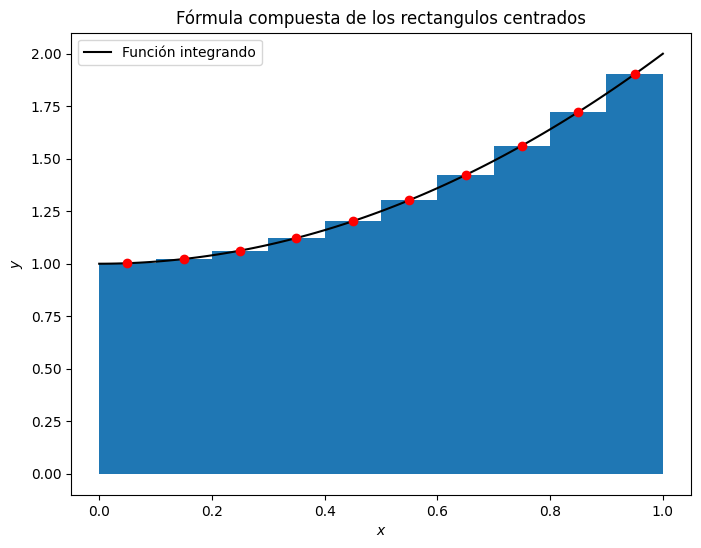

In [27]:
def formula_rectangulo_derecha(f, a, b, n):
    
    h = (b - a) / n
    nodos = np.linspace(a, b, n+1)
    return h * np.sum(f(nodos[1:]))

def formula_rectangulo_centrado(f, a, b, n):
    
    h = (b - a) / n
    nodos = np.linspace(a, b, n+1)
    puntos_medios = (nodos[:-1] + nodos[1:]) / 2
    return h * np.sum(f(puntos_medios))


def f(x):
    return x**2 + 1

a, b = 0, 1
valor_exacto = sp.integrate(f(sp.Symbol('x')), (sp.Symbol('x'), a, b))

n = 10  

# Aproximaciones
aprox_derecha = formula_rectangulo_derecha(f, a, b, n)
aprox_centrada = formula_rectangulo_centrado(f, a, b, n)

# Errores
error_derecha = abs(float(valor_exacto) - aprox_derecha)
error_centrada = abs(float(valor_exacto) - aprox_centrada)
print("-----------------Valor exacto----------------")
print(valor_exacto.evalf())
print("-----------------Rectangulo derecha----------------")
print(aprox_derecha)
print("-----------------Error rectangulo derecha----------")
print(error_derecha)
print("-----------------Rectangulo centrada----------------")
print(aprox_centrada)
print("-----------------Error rectangulo centrada----------")
print(error_centrada)



num_values = 100
x_values = np.linspace(a, b, num_values)
y_values = f(x_values)
nodos = np.linspace(a, b, n+1)
puntos_medios = (nodos[:-1] + nodos[1:]) / 2
y_medios = f(puntos_medios)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, y_values, 'k', label='Función integrando')
ax.plot(puntos_medios, y_medios, 'ro')

for i in range(n):
    ax.add_patch(patches.Rectangle((nodos[i], 0),nodos[i+1] - nodos[i],y_medios[i]))

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Fórmula compuesta de los rectangulos centrados')
plt.show()

> **Ejercicio 7:** Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

/tmp/ipykernel_27774/213139035.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=9)


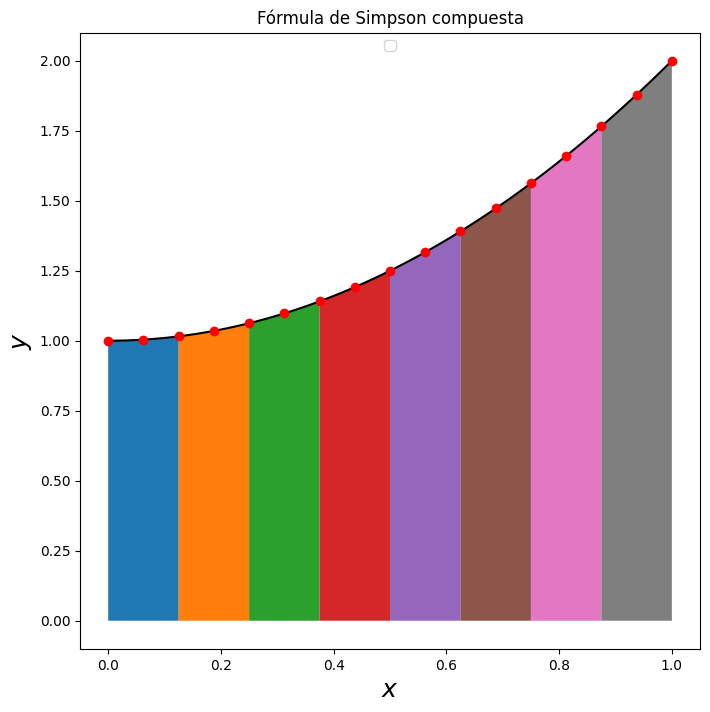

In [28]:
def formula_simpson_compuesta(f, a, b, n):

    h = (b - a) / n
    nodos = np.linspace(a, b, n + 1)
    y = f(nodos)
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return (h / 3) * S
# Ejemplo de uso y comparación gráfica
def f(x):
    return x**2 + 1
a, b = 0, 1
num_values = 100
num_nodos = 16  # Debe ser par para Simpson compuesta
x_values = np.linspace(float(a), float(b), num_values)
y_values = f(x_values)
x_nodos = np.linspace(a, b, num_nodos + 1)
y_nodos = f(x_nodos)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_values, y_values, 'k')

# Dibujar parábolas entre cada par de subintervalos
for k in range(0, num_nodos, 2):
    zz = np.linspace(float(x_nodos[k]), float(x_nodos[k+2]), num_values)
    # Ajuste parabólico por 3 puntos
    coef = np.polyfit(x_nodos[k:k+3], y_nodos[k:k+3], 2)
    yk = np.polyval(coef, zz)
    ax.fill_between(zz, 0, yk)

ax.plot(x_nodos, y_nodos, 'ro')

ax.legend(loc=9)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.set_title('Fórmula de Simpson compuesta')
plt.show()

>**Ejercicio 8:** Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

In [29]:

def formula_trapecios_compuesta(f,a,b,num_nodos):
    """fórmula compuesta de los trapecios con partición uniforme"""
    h = (b-a)/num_nodos
    nodos = np.linspace(a, b, num_nodos+1)  # Genera los nodos de integración (incluyendo los extremos)
    # Otra opción sería
    # nodos = np.array([a + i*h for i in range(num_nodos+1)])

    return h/2*(f(a)+2*np.sum(f(nodos[1:-1]))+f(b))
    # Otra posible implementación sería
    # return h/2*(f(a)+2*sum([f(a+i*h) for i in range(1,num_nodos)])+f(b))


# Intervalo y grados a probar
a, b = 0, 1
grados = np.arange(0, 7) # exponente de x
n_values = [10, 20, 40]     #valores de n para h=b-a/n

errores_trapecio = []
errores_simpson = []
errores_comparados_st=[]
for n in n_values:
    err_t = []
    err_s = []
    err_st =[]
    for i in grados:
        f = lambda x: x**i
        x = sp.Symbol('x')
        valor_exacto = float(sp.integrate(x**i, (x, a, b)))
        aprox_trap = float(formula_trapecios_compuesta(f, a, b, n))
        aprox_simp = float(formula_simpson_compuesta(f, a, b, n ))
        err_t.append(abs(aprox_trap - valor_exacto))
        err_s.append(abs(aprox_simp - valor_exacto))
        err_st.append(abs(aprox_simp-aprox_trap))
    errores_trapecio.append(err_t)
    errores_simpson.append(err_s)
    errores_comparados_st.append(err_st)





Tenemos los errores para cada valor de n = 10 ,20 , 40  y cada grado de x desde 0 hasta 7 , veamos ahora cuando la diferencia entre el valor exacto y el aproximado es 0 para saber con que grado es exacta cada formula

In [30]:
print("-----------n=10 => h=0.1-------------------")
print(f'Errores Trapecio vs Exacto:{errores_trapecio[0]}')
print(f'Errores Simpson vs Exacto:{errores_simpson[0]}')
print(f'Errores Simpson vs Trapecio:{errores_comparados_st[0]}')
print("-----------n=20 => h=0.05-------------------")
print(f'Errores Trapecio vs Exacto :{errores_trapecio[1]}')
print(f'Errores Simpson vs Exacto:{errores_simpson[1]}')
print(f'Errores Simpson vs Trapecio:{errores_comparados_st[1]}')
print("-----------n=40 => h=0.025-------------------")
print(f'Errores Trapecio vs Exacto:{errores_trapecio[2]}')
print(f'Errores Simpson vs Exacto:{errores_simpson[2]}')
print(f'Errores Simpson vs Trapecio:{errores_comparados_st[2]}')

-----------n=10 => h=0.1-------------------
Errores Trapecio vs Exacto:[0.0, 0.0, 0.0016666666666667607, 0.0025000000000000577, 0.0033299999999999996, 0.004158333333333375, 0.004983357142857164]
Errores Simpson vs Exacto:[0.0, 0.0, 0.0, 0.0, 1.3333333333337416e-05, 3.333333333338517e-05, 6.61904761905252e-05]
Errores Simpson vs Trapecio:[0.0, 0.0, 0.0016666666666667607, 0.0025000000000000577, 0.003316666666666662, 0.00412499999999999, 0.004917166666666639]
-----------n=20 => h=0.05-------------------
Errores Trapecio vs Exacto :[0.0, 0.0, 0.0004166666666667318, 0.0006250000000000422, 0.0008331250000000456, 0.0010411458333333956, 0.0012489587053571838]
Errores Simpson vs Exacto:[0.0, 0.0, 0.0, 0.0, 8.333333333387927e-07, 2.0833333333747373e-06, 4.159226190542098e-06]
Errores Simpson vs Trapecio:[0.0, 0.0, 0.0004166666666667318, 0.0006250000000000422, 0.0008322916666667068, 0.0010390625000000209, 0.0012447994791666417]
-----------n=40 => h=0.025-------------------
Errores Trapecio vs Exa

En los errores generados por la comparacion entre la formula del trapecio y la solucion exacta 
vemos que los 2 primeros valores se anulan , los que corresponden a x^0 y x^1 por tanto tenemos que la formula del trapecio compuesta tiene grado de exactitud P1 , en este caso los valores de los errores siguiente no son tan pequenios como para redondearlos a 0 por tanto no los tendremos en cuenta como error de redondeo si no como valor real del error.

Vemos que los errores generados por la comparacion entre la formula de simpson y la solucion exacta nos dejan los 4 primeros valores de nuestra comparacion con valor 0 independientemente del valor de n salvo para n =40 donde el 4 valor es un numero muy cercano a 0 pero lo consideraremos 0 ya que tenemos en cuenta los errores de redonde producidos , esto nos deja en conclusion que la formula de simpson tiene grado de exactitud P3 

>**Ejercicio 9:** Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

In [31]:

d = [7,5,5,7,1,0,7,9] # valores d_i
a = min(d)
b = max(d)

def p(x):
    return sum(d[k]*x**k for k in range(8))
#Calculo T_n para romberg
def Tn(a,b,n,f):
    h =(b-a)/n
    return (h/2) * (f(a)+2*sum(f(a+i*h) for i in range(1,n) ) +f(b))
#Integración de Romberg
def romberg(f, a, b, max_iter=10):
    R = np.zeros((max_iter, max_iter))
    R[0,0] = Tn(a,b,1,f)
    for j in range(1, max_iter):
        R[j,0] = Tn(a,b,2**j,f)
        for k in range(1, j+1):
            R[j,k] = (4**k*R[j,k-1] - R[j-1,k-1])/(4**k - 1)

    return R[max_iter-1, max_iter-1]

# formula de simpson
def S(f, a, b):
    m = (a + b)/2
    return (b - a)/6 * (f(a) + 4*f(m) + f(b))
#simpson adaptativo
def simpson_adaptativo(f, a, b, tol=1e-8,maxiter=1000):
    #recursividad para calcular dependiendo de si se cumple la condicion |S(a,b)-S(a,m)-S(m,b)|<tol
    def calculo_recursivo(f, a, b, eps, S_ab):
        m = (a + b)/2
        S_am = S(f, a, m)
        S_mb = S(f, m, b)
        if abs(S_am + S_mb - S_ab) < eps:
            return S_am + S_mb 
        return calculo_recursivo(f, a, m, eps/2, S_am) + calculo_recursivo(f, m, b, eps/2, S_mb)
    S_ab = S(f, a, b)
    return calculo_recursivo(f, a, b, tol, S_ab)





print("-----------Resultado Romberg----------")
romberg_val = romberg(p,a,b)
print(romberg_val)
print("-----------Resultado Simpson adaptativo----------")
simpson_val = simpson_adaptativo(p, a, b)
print(simpson_val)
print("-----------Valor exacto----------")
x = sp.Symbol('x')
p = sum(d[k]*x**k for k in range(len(d)))
exacto = sp.integrate(p, (x, a, b))
print(exacto.evalf())


-----------Resultado Romberg----------
53235302.175
-----------Resultado Simpson adaptativo----------
53235302.175000004
-----------Valor exacto----------
53235302.1750000


> **Ejercicio 10:** Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integración Romberg y adaptativa manuales con los de la orden `quad`.

In [32]:
d = [7,5,5,7,1,0,7,9] # valores d_i
a = min(d)
b = max(d)

def p(x):
    return sum(d[k]*x**k for k in range(8))



print("--------------Valor exacto-----------")
x = sp.Symbol('x')
p_sym = sum(d[k]*x**k for k in range(8))
valor_exacto = sp.integrate(p_sym, (x, a, b))
print(valor_exacto.evalf())
print("-----------Resultado Romberg----------")
romberg_val = romberg(p,a,b)
print(romberg_val)
print("-----------Resultado Simpson adaptativo----------")
simpson_val = simpson_adaptativo(p, a, b)
print(simpson_val)
print("-----------Orden quad----------")
valor_quad, error_quad = quad(p, a, b)
print(valor_quad)
print("-----------Comparacion----------")
print(f"Error quad vs romberg: {abs(valor_quad-romberg_val)}")
print(f"Error quad vs simpson: {abs(valor_quad-simpson_val)}")

--------------Valor exacto-----------
53235302.1750000
-----------Resultado Romberg----------
53235302.175
-----------Resultado Simpson adaptativo----------
53235302.175000004
-----------Orden quad----------
53235302.17500001
-----------Comparacion----------
Error quad vs romberg: 1.4901161193847656e-08
Error quad vs simpson: 7.450580596923828e-09


Podemos ver que ambas aproximaciones, tanto la de Romberg como la de Simpson, tienen un resultado muy bueno, ya que el error es mínimo.